In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import scipy as sp

5.78266967378023


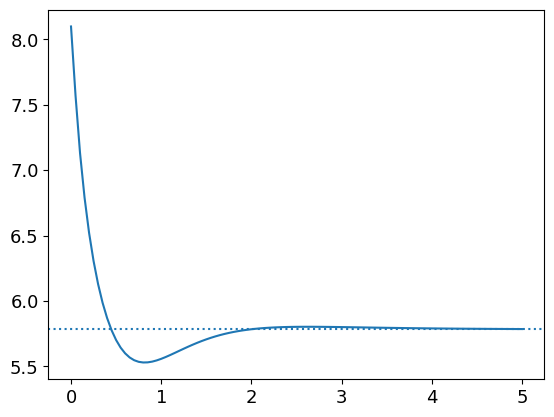

In [22]:
N = 40
vdp = qo.vdp(N, omega = 1.01, Omega_1 = 0, Omega_2 = 3, gamma_1 = 1, gamma_2 = 0.1)

Ham,c_ops = vdp.dynamics()

rho_0 = qt.squeezing(N, 1) * qt.coherent(N, -1+1j)

rho_ss = qt.steadystate(Ham, c_ops)

tlst = np.linspace(0, 5, 101)
rho_t = qt.mesolve(Ham, rho_0, tlst, c_ops).states

stdev_E = []
for rho in rho_t:
    stdev_E.append(np.sqrt(qt.variance(Ham, rho)))
    
print(stdev_ss := np.sqrt(qt.variance(Ham, rho_ss)))
plt.plot(tlst, stdev_E)
plt.axhline(stdev_ss, ls = ":")
plt.show()

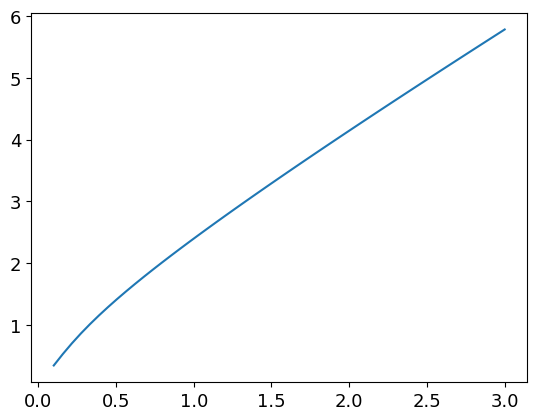

In [16]:
Omega_2_lst = np.linspace(0.1, 3, 51)
stdev_E = []

for Omega_2 in Omega_2_lst:
    vdp = qo.vdp(N, omega = 1.01, Omega_1 = 0, Omega_2 = Omega_2, gamma_1 = 1, gamma_2 = 0.1)

    Ham,c_ops = vdp.dynamics()
    
    rho_ss = qt.steadystate(Ham, c_ops)

    stdev_E.append(np.sqrt(qt.variance(Ham, rho_ss)))

plt.plot(Omega_2_lst, stdev_E)
plt.show()
